### Import necessary libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageOps 

<div style="border-radius:10px; padding: 15px; background-color: #90EE90; font-size:110%; text-align:left;color:black">
    
1 - Does the original image need to enhance? (use original image histogram to prove your answer) 

In [2]:
#read image
img = cv2.imread(r'E:\TA Filoger\Exercise\DIP\DIP16\Exercise_16\original.jpg',0)
img_pil = Image.open(r'E:\TA Filoger\Exercise\DIP\DIP16\Exercise_16\original.jpg')

In [3]:
def show_img_cv(image_title,img):
    cv2.imshow(image_title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
#show_img_cv('Orginal',img)

In [7]:
#img_pil

In [8]:
#function that plot histogram of image
def display_hist_plt(img,bins=256, range=(0,256)):
    plt.figure(figsize=(4,2),dpi=100)
    plt.hist(img.flat,bins=bins,range=range,color ='red')
    plt.show()

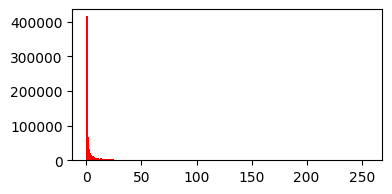

In [9]:
display_hist_plt(img)

$P_x(j) = \sum\limits_{i=0}^{j} P_x(i)$

In [10]:
def get_histogram(image,bins):
    img = np.asanyarray(image)
    img = img.flatten()
    #array with size of bins, set to zeros
    histogram = np.zeros(bins)

    #loop through pixels
    for pixel in img:
        histogram[pixel] +=1

    return histogram

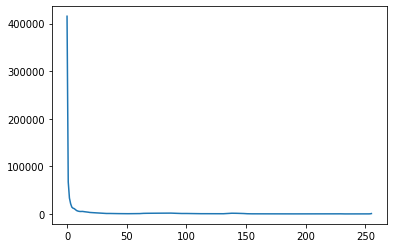

In [11]:
hist = get_histogram(img,256)
plt.plot(hist)

<div style="border-radius:10px; padding: 15px; background-color: #90EE90; font-size:110%; text-align:left;color:black">
    
2- enhance the original image to output image using contrast enhancement ways?

## Contrast Stretching

In [12]:
min_new = 0
max_new = 255
min_old = np.min(img)
max_old = np.max(img)

cs_image = np.uint8(((img-min_old)/(max_old -min_old))*(max_new -min_new)+min_new)

In [14]:
#show_img_cv('CS',cs_image)

## Histogram Equalization

In [15]:
histequ_cv = cv2.equalizeHist(img)

In [18]:
#show_img_cv('hist',histequ_cv)

In [19]:
histequ_pil = ImageOps.equalize(img_pil)

In [20]:
histequ_pil.show()

## Histogram Equalization Implementations

In [21]:
#np.cumsum
def cumsum(a):
    result = [a[0]]
    for i in range(1,len(a)):
        result.append(result[i-1] + a[i])
    return np.array(result)

In [22]:
a = [1,2,3,4,5]
b = cumsum(a)
print(b)

[ 1  3  6 10 15]


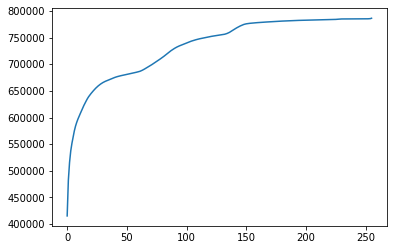

In [23]:
cs_image = cumsum(hist)
plt.plot(cs_image)

In [24]:
cs_image

array([415393., 482569., 515907., 537399., 551761., 563821., 574937.,
       583916., 591008., 597068., 602479., 607577., 612738., 617973.,
       622747., 627247., 631507., 635635., 639196., 642287., 645156.,
       647866., 650454., 652923., 655279., 657431., 659427., 661225.,
       662915., 664423., 665785., 666980., 668069., 668998., 669988.,
       670945., 671871., 672786., 673696., 674576., 675406., 676183.,
       676852., 677487., 678074., 678584., 679106., 679581., 680092.,
       680599., 681084., 681543., 682019., 682514., 682994., 683494.,
       683961., 684506., 685040., 685581., 686146., 686856., 687790.,
       688859., 690035., 691328., 692648., 693958., 695265., 696638.,
       697985., 699463., 700937., 702426., 703928., 705424., 706944.,
       708485., 710028., 711597., 713182., 714911., 716692., 718525.,
       720305., 722138., 723859., 725541., 727073., 728591., 729954.,
       731257., 732448., 733536., 734541., 735446., 736329., 737270.,
       738167., 7391

## Re Normalize cumsum values

In [27]:
nj = (cs_image - cs_image.min())*255

N = cs_image.max() - cs_image.min()

cs = nj / N

In [28]:
cs

array([  0.        ,  46.16733012,  69.07918036,  83.84975703,
        93.72017497, 102.00852202, 109.64809629, 115.81899746,
       120.69304035, 124.85783166, 128.57659168, 132.08023954,
       135.62718474, 139.22498713, 142.50596299, 145.59862979,
       148.52635437, 151.36336072, 153.81069106, 155.93500953,
       157.90675643, 159.76922911, 161.54785616, 163.24469934,
       164.86388223, 166.34286423, 167.71463377, 168.95032598,
       170.11179418, 171.14818119, 172.08422834, 172.9055032 ,
       173.65392856, 174.29239244, 174.97277914, 175.63048628,
       176.26688839, 176.89573064, 177.52113659, 178.12592477,
       178.69634998, 179.23035045, 179.69012691, 180.12653656,
       180.52995777, 180.88046001, 181.23920936, 181.56565752,
       181.91684702, 182.26528748, 182.59860823, 182.91406025,
       183.24119567, 183.58138902, 183.91127348, 184.25490312,
       184.57585321, 184.95040953, 185.31740599, 185.68921326,
       186.07751476, 186.56546886, 187.20736904, 187.94

In [29]:
cs = cs.astype('uint8')

In [30]:
img_flat  = np.array(img_pil)
flat = img_flat.flatten()

In [31]:
img_new = cs[flat]

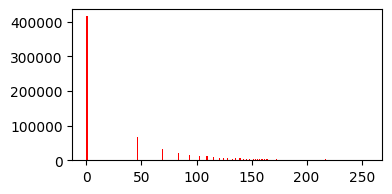

In [32]:
display_hist_plt(img_new)

In [34]:
img_new.shape
img_new = np.reshape(img_new,img.shape)

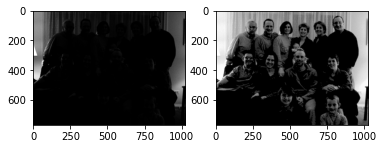

In [35]:
plt.subplot(121)
plt.imshow(img_pil,cmap='gray')
plt.subplot(122)
plt.imshow(img_new,cmap='gray')

## Gamma

In [36]:
gamma = 0.4
gamma_img = np.uint8(((img/255)**gamma)*255)

In [37]:
show_img_cv('gamma',gamma_img)

<div style="border-radius:10px; padding: 15px; background-color: #90EE90; font-size:110%; text-align:left;color:black">
    
3- Plot the output image histogram.

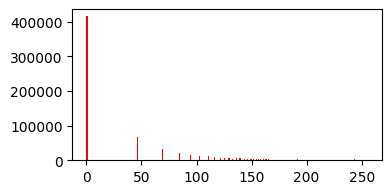

In [38]:
display_hist_plt(histequ_cv)

# Contrast Enchantment of Color Image

## YUV

In [39]:
img_color = cv2.imread('Low_light.jpg')

In [40]:
# convert Image to YUV
img_yuv = cv2.cvtColor(img_color,cv2.COLOR_BGR2YUV)

In [41]:
#equalize the histogram of  the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

In [42]:
#Convert the YUV image back to BGR format
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)

In [43]:
cv2.imshow("Color input Image",img_color)
cv2.imshow("Histogram equalize",img_output)
cv2.waitKey(0)

-1

## LAB

In [44]:
img_Lab = cv2.cvtColor(img_color,cv2.COLOR_BGR2LAB)

In [46]:
# spilt the image
l_channels,a_channels,b_channels = cv2.split(img_Lab)

In [47]:
l_channel_equalize = cv2.equalizeHist(l_channels)

In [54]:
# merge the channels
img_lab_equalize = cv2.merge((l_channel_equalize,b_channels,a_channels))

In [55]:
# convert LAB to BGR
img_out = cv2.cvtColor(img_lab_equalize,cv2.COLOR_LAB2BGR)

In [56]:
cv2.imshow('Color Image',img_color)
cv2.imshow('LAB',img_out)
cv2.waitKey(0)

-1